## Seaborn 라이브러리

- seaborn은 Matplotlib의 기능과 스타일을 확장한 파이썬 시각화 도구의 고급버전이다. 비교적 단순한 인터페이스를 제공하기 때문에 사용이 어렵지 않다.
- seaborn 라이브러리를 설치를 해야한다. (아나콘다 배포판은 기본적으로 설치되어 있다.)
- 약칭 sns를 주로 사용한다.

In [1]:
import seaborn as sns

### seaborn 내장 데이터셋 이용하기

In [2]:
titanic  = sns.load_dataset('titanic')

In [3]:
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [4]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


### 회귀선이 있는 산점도

regplot() 함수는 서로 다른 2개의 연속 변수 사이의 산점도를 그리고 선형회귀 분석에 의한 회귀선을 함께 나타낸다. fit_reg=False 옵션을 설정하면 회귀선을 안 보이게 할 수 있다.

In [6]:
import matplotlib.pyplot as plt

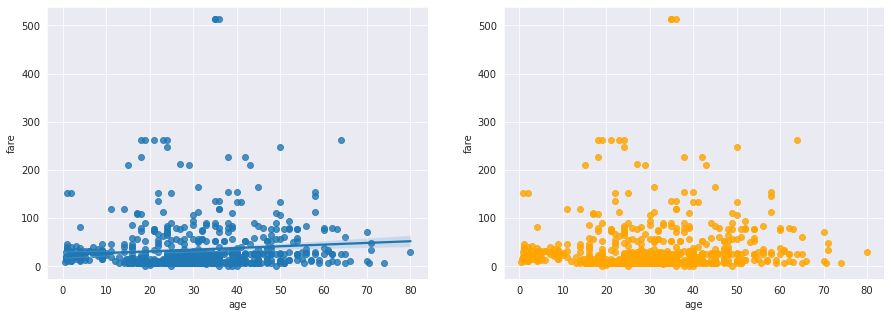

In [10]:
# 스타일 테마 설정(5가지: darkgird, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 그래프 그리기
sns.regplot(x='age',      #x축변수
           y='fare',     #y축변수
           data=titanic, #데이터
           ax=ax1)       #axe객체 1번째 그래프
sns.regplot(x='age',      #x축변수
           y='fare',     #y축변수
           data=titanic, #데이터
           ax=ax2,       #axe객체 1번째 그래프
          fit_reg=False,  #회귀선 미표시
           color='orange')# 색깔 변경
plt.show()

### 히스토그램/커널 밀도 그래프

단변수(하나의 변수) 데이터의 분포를 확인할 때 distplot() 함수를 이용한다. 기본값으로 히스토그램과 커널 밀도 함수를 그래프로 출력한다.

/home/jackjack/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


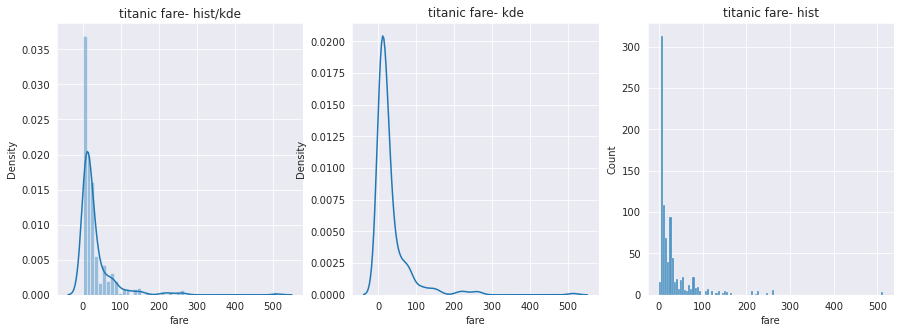

In [14]:
# 스타일 테마 설정(5가지: darkgird, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성(figure에 3개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# distplot 밀도함수(hist=False, kde=False 옵션을 지정가능 )
sns.distplot(titanic['fare'], ax=ax1)

# kdeplot 커널 밀도 함수 (그래프와 x축 사이의 면적이 1이 되도록  그리는 밀도 분포 함수)
sns.kdeplot(x='fare', data=titanic, ax=ax2)

#histplot 히스토그램 그래프를 그리는 함수
sns.histplot(x='fare', data=titanic, ax=ax3)

#차트 제목 표시
ax1.set_title('titanic fare- hist/kde')
ax2.set_title('titanic fare- kde')
ax3.set_title('titanic fare- hist')

plt.show()

### 히트맵

- seaborn 라이브러리는 히트맵을 그리는 heatmap() 메소드를 제공한다. 2개의 범주형 변수를 각각 x,y축에 넣고 데이터를 매트릭스 형태로 분류한다.
- 데이터프레임을 피벗테이블로 정리할 때 한 변수를 행 인덱스로 나머지 변수는 열이름으로 설정한다. aggfunc='' 옵션은 데이터 값의 크기를 기준으로 집계한다는 뜻이다.

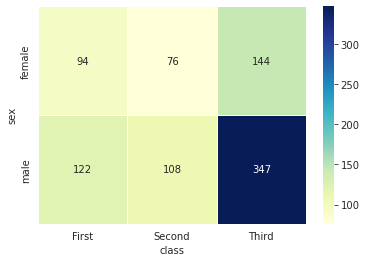

In [16]:
# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table,                  # 데이터프레임
            annot=True, fmt='d',    # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu',          # 컬러 맵
            linewidth=.5,           # 구분 선
            cbar=True)             # 컬러 바 표시 여부

plt.show()

### 범주형 데이터의 산점도 

- 범주형 변수에 들어 있는 각 범주별 데이터의 분포를 확인하는 방법이다. stripplot() 함수와 swarmplot() 함수를 사용할 수 있다.
- swarmplot() 함수는 데이터의 분산까지 고려하여, 데이터 포인트가 서로 중복되지 않게 그리낟. 데이터가 퍼져 있는 정도로 입체적으로 볼 수 있다.

/home/jackjack/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


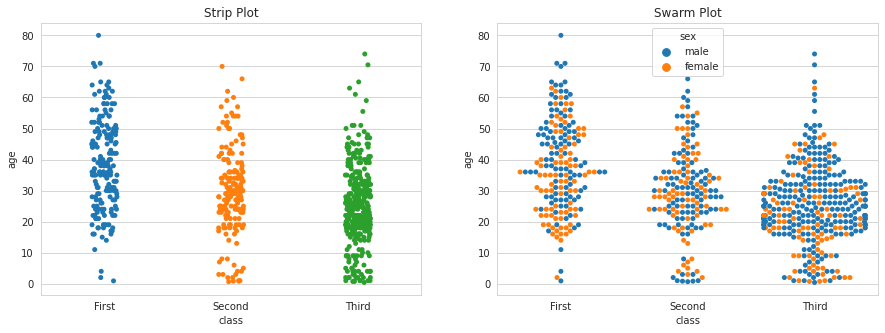

In [20]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
 
# 이산형 변수의 분포 - 데이터 분산 미고려
sns.stripplot(x="class",      #x축 변수
              y="age",        #y축 변수           
              data=titanic,   #데이터셋 - 데이터프레임
              ax=ax1)         #axe 객체 - 1번째 그래프 

# 이산형 변수의 분포 - 데이터 분산 고려 (중복 X) 
sns.swarmplot(x="class",      #x축 변수
              y="age",        #y축 변수
              data=titanic,   #데이터셋 - 데이터프레임
              ax=ax2,         #axe 객체 - 2번째 그래프      
             hue='sex')       #남녀에 따라 색상 구분

# 차트 제목 표시
ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')

plt.show()

### 막대 그래프

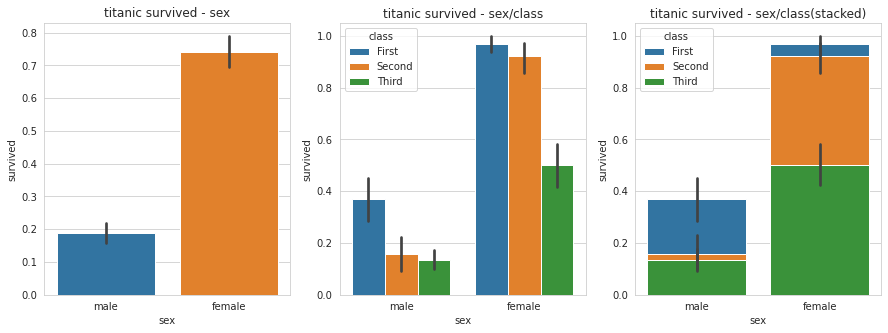

In [21]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# x축, y축에 변수 할당
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1) 

# x축, y축에 변수 할당하고 hue 옵션 추가 
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2) 

# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)       

# 차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

### 빈도 그래프

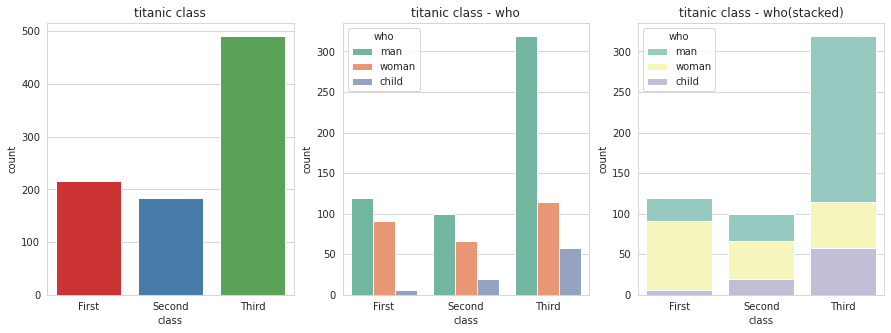

In [24]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# 기본값
sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1) 

# hue 옵션에 'who' 추가 
sns.countplot(x='class', hue='who', palette='Set2', data=titanic, ax=ax2) 

# dodge=False 옵션 추가 (축 방향으로 분리하지 않고 누적 그래프 출력) dodge=False
sns.countplot(x='class', hue='who', palette='Set3', dodge=False, data=titanic, ax=ax3)       

# 차트 제목 표시
ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

### 박스 플롯/바이올린 그래프

- 박스플롯은 범주형 데이터 분포와 주요 통계지표를 함께 제공, 다만 박스 플롯만으로 **데이터가 퍼져 있는 분산의 정도**를 정확하게 알기는 어렵기 때문에 커널 밀도 함수 그래프를 y축 방향에 추가하여 **바이올린 그래프**를 그리는 경우가 있다.
- 박스플롯은 boxplot(), 바이올린 그래프는 violinplot() 함수로 그린다.

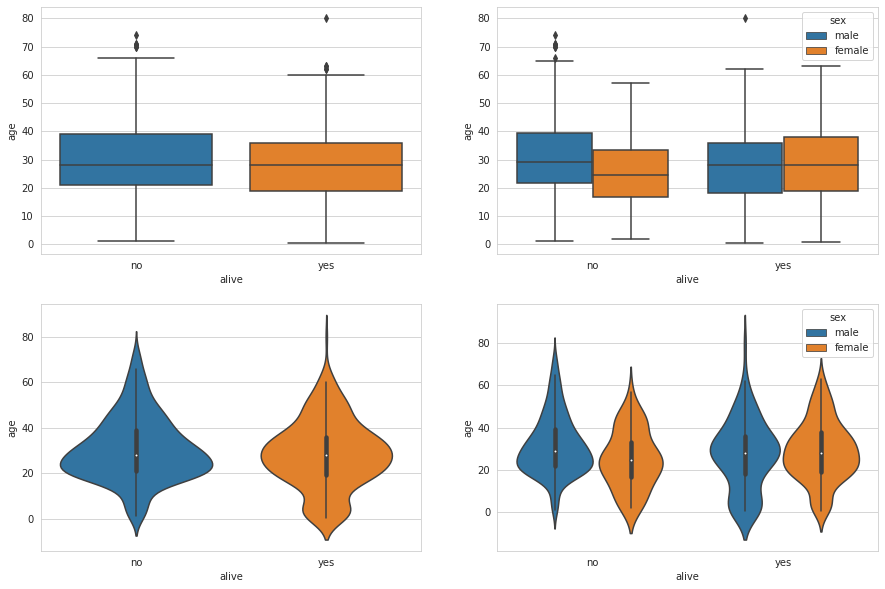

In [23]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 4개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 10))   
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
 
# 박스 그래프 - 기본값
sns.boxplot(x='alive', y='age', data=titanic, ax=ax1) 

# 바이올린 그래프 - hue 변수 추가
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2) 

# 바이올린 그래프 - 기본값
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3) 

# 바이올린 그래프 - hue 변수 추가
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4) 

plt.show()

### 조인트 그래프

- jointplot() 함수로 그리며 산점도를 기본으로 표시하고 x-y축에 각 변수에 대한 히스토그램을 동시에 보여준다.
- 두변수의 관계와 데이터가 분산되어 있는 정도를 한눈에 파악하기 좋다.

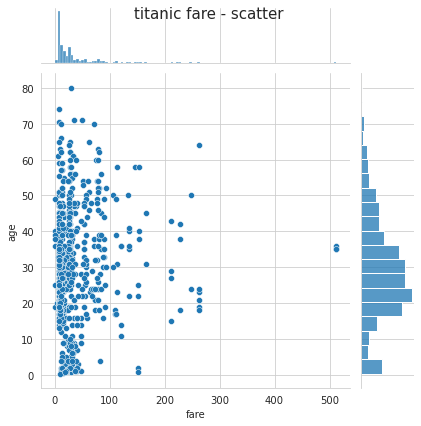

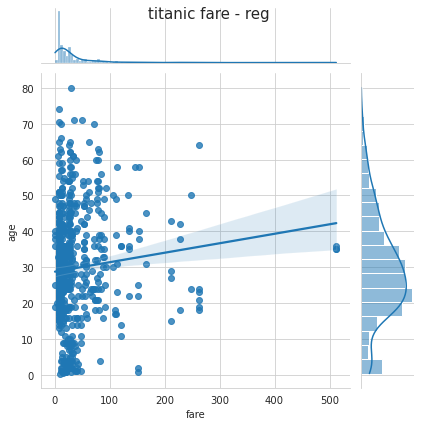

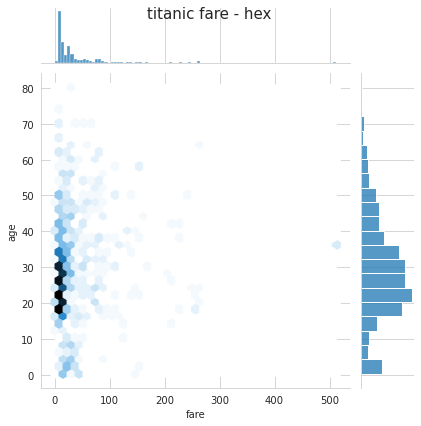

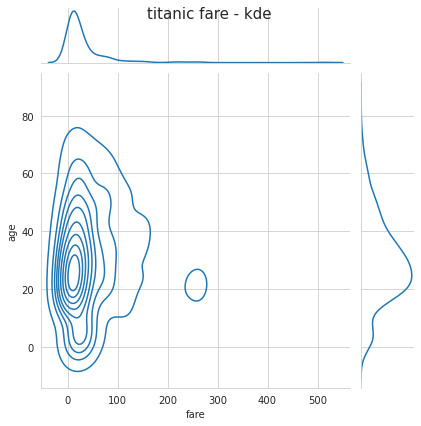

In [25]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 조인트 그래프 - 산점도(기본값)
j1 = sns.jointplot(x='fare', y='age', data=titanic) 

# 조인트 그래프 - 회귀선
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic) 

# 조인트 그래프 - 육각 그래프
j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic) 

# 조인트 그래프 - 커럴 밀집 그래프
j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic) 

# 차트 제목 표시
j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)

plt.show()


jointplot() 은 ax 옵션이 없다는 것을 유념해야한다.

### 조건을 적용하여 화면을 그리드로 분할 하기

- FaceGrid() 함수는 행, 열 방향으로 서로 다른 조건을 적용하여 여러 개의 서브 플롯을 만든다.
- 각 서브플롯에 적용할 그래프 종류를 map() 매소를 이용하여 그리드 객체에 전달한다.

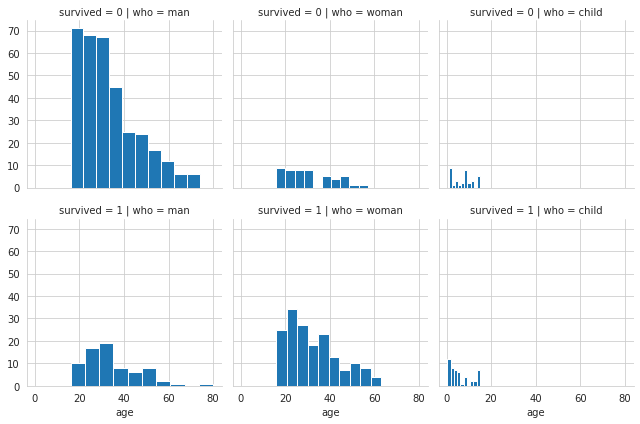

In [28]:
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 조건에 따라 그리드 나누기
g = sns.FacetGrid(data=titanic, col='who', row='survived') 

# 그래프 적용하기
g = g.map(plt.hist, 'age')

결과는 남성에 비해 여성 생존자가 상대적으로 많은 편이고, 성인 중에는 20~40대의 생존자가 많은 것으로 나타난다.

### 이변수 데이터의 분포

- pairplot() 함수는 인자로 전달되는 데이터프레임의 열을 두 개씩 짝을 지을 수 있는 모든 조합에 대해 표현한다. 
- 그래프를 그리기 위해 만들어진 짝의 개수만큼 화면을 그리드로 나눈다. 예제에서는 3개의 열을 사용하기 때문에 3행x3열 크기로 모두 9개의 그리드를 만든다. 각 그리드에 두 변수 간의 관계를 나타내는 그래프를 하나씩 그린다.

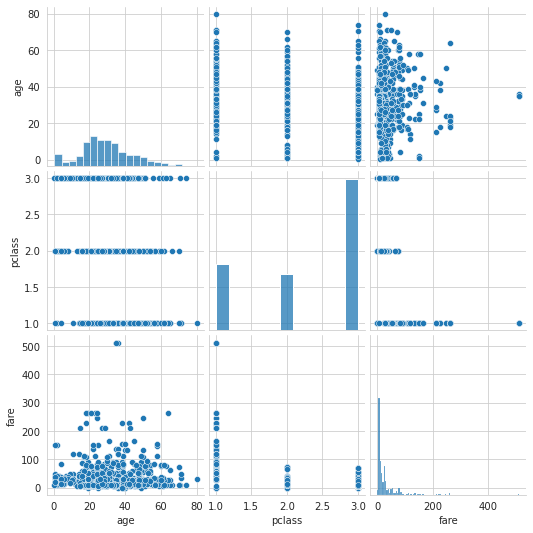

In [31]:
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# titanic 데이터셋 중에서 분석 데이터 선택하기
titanic_pair = titanic[['age','pclass', 'fare']]

# 조건에 따라 그리드 나누기
g = sns.pairplot(titanic_pair)